In [101]:
import pandas as pd
import numpy as np
import datetime as dt
from tqdm import tqdm
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12, 7

In [12]:
#df_trans = pd.read_csv('/tmp/.fr-2qZZCD/transactions_last_2.csv', delimiter=';', nrows=10e6)
df_trans = pd.read_csv('transactions_clothes.csv', index_col=0)
print(df_trans.shape)
df_trans.head()

/home/konstantinlipkin/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(1476470, 16)


,purchdate,amount,mcc,mrchcity,mrchname,cnum,category,store_name,merchant_name,created_at,cnum_,categorycode,gender,age,married_,residenttype
69,2019-10-26 00:00:00,2097.0,5651,KRASNOYARSK,A&C F6G,ELCMDT,Clothes,H&M,A&C F6G,2019-10-26,ELCMDT,81,M,50,married,R
73,2019-11-02 00:00:00,6696.0,5651,PSKOV,XKE4D K29,ELCMDT,Clothes,O`Stin,XKE4D K29,2019-11-02,ELCMDT,81,M,50,married,R
82,2019-09-26 00:00:00,1997.0,5691,KRASNOYARSK,J1K1JT18,ELCMDT,Clothes,Reserved,J1K1JT18,2019-09-26,ELCMDT,81,M,50,married,R
126,2019-11-07 00:00:00,1299.0,5691,KRASNOYARSK,C7DZX WH7D1E7,ELCMDT,Clothes,�����,C7DZX WH7D1E7,2019-11-07,ELCMDT,81,M,50,married,R
127,2019-11-09 00:00:00,2249.0,5691,KRASNOYARSK,C7DZX WH7D1E7,ELCMDT,Clothes,�����,C7DZX WH7D1E7,2019-11-09,ELCMDT,81,M,50,married,R


In [3]:
df_cc = pd.read_csv('client_categories.csv', delimiter=';')
print(df_cc.shape)
df_cc.head()

(27, 2)


,category,description
0,10,VIP/ Management recommendations
1,11,VIP/ Management recommendations (family)
2,17,Private Banking customers walk-in
3,18,Private banking customers payroll
4,20,High income individuals


In [4]:
df_cf = pd.read_csv('clients_last_2_fixed.csv', delimiter=';')
print(df_cf.shape)
df_cf.head()

(1355925, 6)


,cnum_,categorycode,gender,age,married_,residenttype
0,0CCCDO,81,M,32,not_married,R
1,0CCCFO,70,F,42,not_married,R
2,0CCCGC,50,F,33,married,R
3,0CCCGG,70,M,58,not_married,R
4,0CCCGO,60,M,38,married,R


In [5]:
df_mcc = pd.read_excel('MCC.xlsx', delimiter=';')
print(df_mcc.shape)
df_mcc.head()

(896, 2)


,mcc,category
0,742,Pet
1,763,Other
2,780,Maintenance and building
3,1520,Maintenance and building
4,1711,Maintenance and building


In [6]:
df_mccl = pd.read_excel('MCC_last.xlsx', delimiter=';')
print(df_mccl.shape)
df_mccl.head()

(925, 2)


,mcc,category
0,742,Pet
1,763,Other
2,780,Maintenance and building
3,1520,Maintenance and building
4,1711,Maintenance and building


In [7]:
df_mcc.append(df_mccl).drop_duplicates().shape

(939, 2)

In [8]:
df_sl.store_name.isin(df_s.partner_name).sum()

NameError: name 'df_sl' is not defined

In [9]:
df_s = pd.read_csv('skidki.csv', delimiter=';', engine='python')
print(df_s.shape)
df_s.head()

(52, 8)


,partner_name,offer_name,category,percents_,selltype,city_name,comment,enddate
0,Teana,Tean�,���������� � ���������,10.0,Online,NaN,����������� ������������� ������ � ��������-��...,2021-10-01 03:00:00
1,Prime Travel,Prime Travel,�����������,5.0,Online,NaN,������ � ������� �������.����� ���������� ����...,2020-12-31 03:00:00
2,Special Travel Club,Special Travel Club,�����������,12.0,Online,NaN,NaN,2020-12-31 03:00:00
3,Hotels.com,Hotels.com,�����������,10.0,NaN,NaN,"�������� ��������� ������ �� �����, ����������...",2020-12-31 03:00:00
4,������.����,������.����,����� � �����������,NaN,Online,NaN,90 ���� �������� ������.����. ��������� �� ���...,2020-12-31 03:00:00


In [10]:
df_sl = pd.read_csv('store_last_2.csv', delimiter=';', engine='python')
print(df_sl.shape)
df_sl.head()

(503285, 2)


,store_name,merchant_name
0,��������,VVVVVVVVVVVVSG/W7J4K 07ZL
1,����,VVVVVVVVVVVVR4U4 CXD1O
2,��������,VVVVVVVVVVV/078 WXWLH7J K
3,��������,VVVVVVVVVVV/08 7JJ4T7H AK
4,��������,VVVVVVVVVVV1SV6


In [11]:
df_trans = df_trans.merge(
    df_mcc.append(df_mccl).drop_duplicates(), 
    on='mcc', how='inner')
df_trans = df_trans.merge(df_sl, left_on='mrchname', right_on='merchant_name')
print(df_trans.shape)
df_trans.head()

(1476470, 19)


,purchdate,amount,mcc,mrchcity,mrchname,cnum,category_x,store_name_x,merchant_name_x,created_at,cnum_,categorycode,gender,age,married_,residenttype,category_y,store_name_y,merchant_name_y
0,2019-10-26 00:00:00,2097.00,5651,KRASNOYARSK,A&C F6G,ELCMDT,Clothes,H&M,A&C F6G,2019-10-26,ELCMDT,81,M,50,married,R,Clothes,H&M,A&C F6G
1,2019-12-08 00:00:00,349.00,5651,KRASNOYARSK,A&C F6G,QNQJMT,Clothes,H&M,A&C F6G,2019-12-08,QNQJMT,70,M,41,not_married,R,Clothes,H&M,A&C F6G
2,2019-12-14 00:00:00,1199.00,5651,KRASNOYARSK,A&C F6G,7YCOHH,Clothes,H&M,A&C F6G,2019-12-14,7YCOHH,50,M,51,married,R,Clothes,H&M,A&C F6G
3,2019-10-06 00:00:00,1104.15,5651,KRASNOYARSK,A&C F6G,EEQAEO,Clothes,H&M,A&C F6G,2019-10-06,EEQAEO,50,M,39,married,R,Clothes,H&M,A&C F6G
4,2019-11-26 00:00:00,799.00,5651,KRASNOYARSK,A&C F6G,ELXNTK,Clothes,H&M,A&C F6G,2019-11-26,ELXNTK,70,M,40,married,R,Clothes,H&M,A&C F6G


In [29]:
df_trans.category.value_counts()

Clothes    1476470
Name: category, dtype: int64

In [110]:
df_trans[df_trans.category == 'Clothes'].store_name.value_counts()[190:210]

Tous               589
Crockid            585
Mario Mikke        577
The outnet         561
Banana Republic    558
Michael Kors       552
Albione            552
Swarovski          551
������ �������     537
Togas              535
Triumph            532
Deseo              525
Armani Exchange    525
Quiksilver         521
Lc waikiki         517
H&m                515
Low price          507
Kupivip.ru         497
Prada              492
Stefanel           489
Name: store_name, dtype: int64

In [158]:
#store_name = 'Metro Cash&Carry'
store_name = 'Louis Vuitton'
store_name = 'H&M'

In [14]:
tqdm.pandas()
df_trans['created_at'] = df_trans.purchdate.progress_apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

/home/konstantinlipkin/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 1476470/1476470 [00:13<00:00, 106514.40it/s]


In [32]:
df_trans.created_at.max()

Timestamp('2019-12-20 00:00:00')

In [70]:
df_trans.sort_values(by=['created_at'], inplace=True)

In [71]:
def get_week(date):
    day = date.day
    if day < 7:
        day = 1
    elif day < 14:
        day = 7
    elif day < 21:
        day = 14
    else:
        day = 21
    return date.replace(day=day)
    

#dates_sorted = sorted(df_trans.created_at.apply(lambda x: x.replace(day=1)).unique())
dates_sorted = sorted(df_trans.created_at.apply(get_week).unique())
len(dates_sorted)

14

In [72]:
#dates_sorted = df_trans.created_at.sort_values().unique()
#dates_sorted = sorted(set([d.replace(day=1) for d in dates_sorted if isinstance(d, )]))

#dates_sorted = sorted(dates_sorted.created_at.apply(lambda x: x.replace(day=1)).unique())

res = pd.DataFrame(np.zeros((len(dates_sorted), len(dates_sorted))), columns=list(range(len(dates_sorted))), index=dates_sorted)

unique_users = list()
dates = list()

for idx, row in tqdm(df_trans[df_trans.store_name == store_name].iterrows()):
    #created_at = row.created_at.replace(day=1)
    created_at = get_week(row.created_at)
    if row.cnum not in unique_users:
        unique_users.append(row.cnum)
        dates.append(created_at)
    else:
        #print(unique_users.index(row['cnum']))
        #print(row['created_at'])
        #print(dates[unique_users.index(row['cnum'])])
        #print((row['created_at'] - dates[unique_users.index(row['cnum'])]).days)
        res.loc[dates[unique_users.index(row['cnum'])], int((created_at - dates[unique_users.index(row['cnum'])]).days / 7)] += 1

897it [00:00, 1297.65it/s]


In [73]:
dates[unique_users.index(row['cnum'])]

Timestamp('2019-12-01 00:00:00')

In [49]:
df_trans[df_trans.cnum == 'ELETCO'].amount.median()

58366.675

In [74]:
res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2019-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-14,1.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0
2019-09-21,8.0,1.0,3.0,1.0,3.0,2.0,4.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0
2019-10-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-07,4.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
2019-10-14,3.0,2.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-10-21,10.0,2.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-01,7.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-07,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-14,3.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
res.sum(axis=0) / res.sum(axis=0).max()

0     1.000000
1     0.433333
2     0.333333
3     0.250000
4     0.183333
5     0.216667
6     0.100000
7     0.100000
8     0.150000
9     0.000000
10    0.000000
11    0.050000
12    0.050000
13    0.016667
dtype: float64

In [76]:
print(dates[unique_users.index(row['cnum'])])
print(created_at)

2019-12-01 00:00:00
2019-12-14 00:00:00


In [77]:
df_plot = pd.DataFrame(res.sum(axis=0) / res.sum(axis=0).max(), columns=['%'])
df_plot['week_delta'] = range(len(df_plot))
df_plot

,%,week_delta
0,1.000000,0
1,0.433333,1
2,0.333333,2
3,0.250000,3
4,0.183333,4
5,0.216667,5
6,0.100000,6
7,0.100000,7
8,0.150000,8
9,0.000000,9


In [88]:
#dates_sorted = df_trans.created_at.sort_values().unique()
#dates_sorted = sorted(set([d.replace(day=1) for d in dates_sorted if isinstance(d, )]))

#dates_sorted = sorted(dates_sorted.created_at.apply(lambda x: x.replace(day=1)).unique())

retention_all = []

for sn in tqdm(df_trans.store_name.unique()[::20], total=len(df_trans.store_name.unique()[::10])):
    dates_sorted = sorted(df_trans.created_at.apply(get_week).unique())

    res_all = pd.DataFrame(np.zeros((len(dates_sorted), len(dates_sorted))), columns=list(range(len(dates_sorted))), index=dates_sorted)

    unique_users = list()
    dates = list()

    for idx, row in df_trans[df_trans.store_name == sn].iterrows():
        #created_at = row.created_at.replace(day=1)
        created_at = get_week(row.created_at)
        if row.cnum not in unique_users:
            unique_users.append(row.cnum)
            dates.append(created_at)
        else:
            #print(unique_users.index(row['cnum']))
            #print(row['created_at'])
            #print(dates[unique_users.index(row['cnum'])])
            #print((row['created_at'] - dates[unique_users.index(row['cnum'])]).days)
            res_all.loc[dates[unique_users.index(row['cnum'])], int((created_at - dates[unique_users.index(row['cnum'])]).days / 7)] += 1
            
    ret = (res_all.sum(axis=0) / res_all.sum(axis=0).max()).fillna(0.)
    
    if len(retention_all) == 0:
        retention_all = ret
    else:
        retention_all += ret

 51%|█████     | 48/95 [13:51<13:34, 17.33s/it]  


In [94]:
df_plot_all = pd.DataFrame(retention_all / 48, columns=['%'])
df_plot_all['week_delta'] = range(len(df_plot_all))
df_plot_all

,%,week_delta
0,0.611111,0
1,0.216480,1
2,0.162540,2
3,0.131244,3
4,0.163945,4
5,0.118988,5
6,0.122268,6
7,0.093618,7
8,0.109685,8
9,0.038387,9


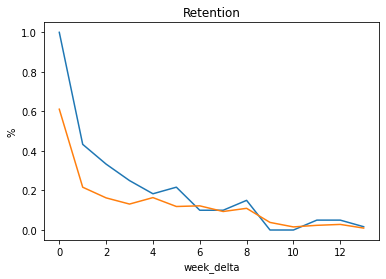

In [95]:
import seaborn as sns

ax = sns.lineplot(data=df_plot, x='week_delta', y='%');
sns.lineplot(data=df_plot_all, x='week_delta', y='%');
ax.set_title('Retention');

In [23]:
df_trans['month'] = df_trans.created_at.progress_apply(lambda x: x.replace(day=1))

100%|██████████| 1476470/1476470 [00:09<00:00, 148746.48it/s]


In [34]:
df_trans['current_store_name'] = df_trans.store_name.apply(lambda x: x if x == store_name else 'Others')

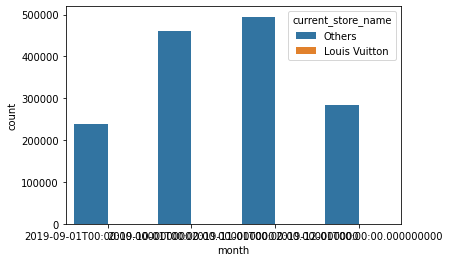

In [37]:
sns.countplot(data=df_trans, x='month', hue='current_store_name');

In [159]:
pivot = df_trans.pivot_table(['mcc'], ['store_name'], aggfunc='count')
pivot.rename(columns={'mcc': 'purchase_count'}, inplace=True)
pivot.sort_values(by='purchase_count', ascending=False, inplace=True)

stores_of_interest = [store_name] + pivot.index.to_list()[:20]

In [177]:
pivot = df_trans.pivot_table(['created_at', 'mcc'], ['store_name'], aggfunc={'created_at': 'min', 'mcc': 'count'})
pivot.rename(columns={'mcc': 'purchase_count'}, inplace=True)
pivot.sort_values(by=['purchase_count', 'created_at'], ascending=False, inplace=True)

top_k = 15
if store_name not in pivot.index.to_list()[:top_k]:
    stores_of_interest = [store_name] + pivot.index.to_list()[:top_k]
else:
    stores_of_interest = pivot.index.to_list()[:top_k]
    stores_of_interest.remove(store_name)
    stores_of_interest = [store_name] + stores_of_interest
    
#stores_of_interest.insert(0, stores_of_interest.pop(-1))

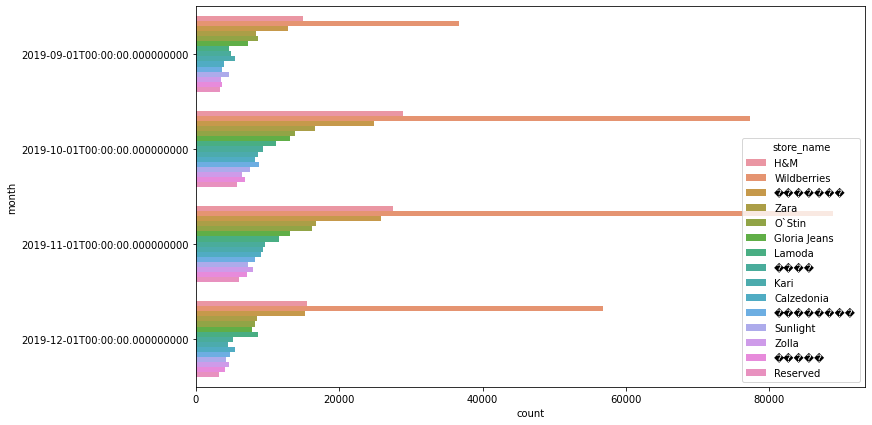

In [178]:
sns.countplot(data=df_trans[df_trans.store_name.isin(stores_of_interest)], y='month', hue='store_name', hue_order=stores_of_interest);

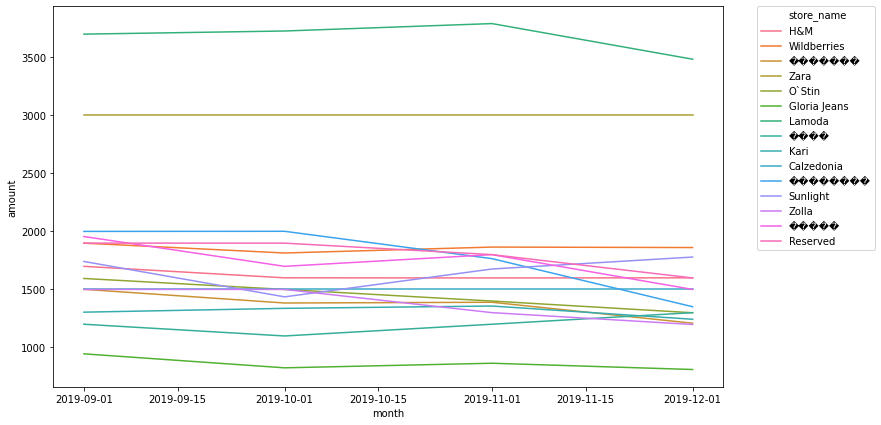

In [179]:
sns.lineplot(data=df_trans[df_trans.store_name.isin(stores_of_interest)].pivot_table(['amount'], ['month', 'store_name'], aggfunc='median').reset_index(), x='month', y='amount', hue='store_name', hue_order=stores_of_interest, );
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)